In [29]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as pp
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.max_colwidth', None)

In [2]:
#get api key from fred_api.py (mask api)
fred_api_key = open('/workspaces/Python-Projects/fred_api.py').readline()
fred = Fred(api_key=fred_api_key)

In [3]:
#search data (https://fred.stlouisfed.org/categories)
search = fred.search('loan', order_by='popularity', filter=('frequency', 'Monthly'))
search = search[['id','title', 'frequency', 'units', 'units_short', 'seasonal_adjustment', 'notes']]
search = search[search['title'].str.contains('Consumer Credit')]
search

,id,title,frequency,units,units_short,seasonal_adjustment,notes
series id,,,,,,,
TOTALSL,TOTALSL,Total Consumer Credit Owned and Securitized,Monthly,Billions of Dollars,Bil. of $,Seasonally Adjusted,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
REVOLSL,REVOLSL,Revolving Consumer Credit Owned and Securitized,Monthly,Billions of Dollars,Bil. of $,Seasonally Adjusted,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
TOTALSLAR,TOTALSLAR,Percent Change of Total Consumer Credit,Monthly,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
NONREVSL,NONREVSL,Nonrevolving Consumer Credit Owned and Securitized,Monthly,Billions of Dollars,Bil. of $,Seasonally Adjusted,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
FLTOTALSL,FLTOTALSL,"Total Consumer Credit Owned and Securitized, Flow",Monthly,"Billions of Dollars, Monthly Rate","Bil. of $, Monthly Rate",Seasonally Adjusted,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
M10092USM144NNBR,M10092USM144NNBR,Total Consumer Credit Outstanding for United States,"Monthly, End of Month",Millions of Dollars,Mil. Of $,Not Seasonally Adjusted,"These Estimates Cover Both Installment Credit And Noninstallment Credit Outstanding At The End Of The Month. Source: Federal Reserve Board, Data For 1929-1946: Bulletin Of April 1953; Data For 1947-1967: ""Consumer Credit, "" Supplement To Banking And Monetary Statistics, Section 16 (New); Data For 1968: Monthly Bulletins This NBER data series m10092 appears on the NBER website in Chapter 10 at http://www.nber.org/databases/macrohistory/contents/chapter10.html. NBER Indicator: m10092"
REVOLSLAR,REVOLSLAR,Percent Change of Total Revolving Consumer Credit,Monthly,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
TOTALNS,TOTALNS,Total Consumer Credit Owned and Securitized,Monthly,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."
FLREVOLSL,FLREVOLSL,"Revolving Consumer Credit Owned and Securitized, Flow",Monthly,"Billions of Dollars, Monthly Rate","Bil. of $, Monthly Rate",Seasonally Adjusted,"For further information, please refer to the Board of Governors of the Federal Reserve System's G.19 release, online at http://www.federalreserve.gov/releases/g19/."


In [21]:
#interest rate data related
fed_rate = fred.get_series('FEDFUNDS', observation_start='1/1/2000')
fed_rate = fed_rate.to_frame(name='FED FUNDS RATE')
housing_loans = fred.get_series('RHEACBW027SBOG', observation_start='1/1/2000')
housing_loans = housing_loans.to_frame(name='HOUSING MORTGAGES')
consumer_loans = fred.get_series('CLSACBW027SBOG', observation_start='1/1/2000')
consumer_loans = consumer_loans.to_frame(name='CONSUMER LOANS')
default_cl = fred.get_series('DRCLACBS', observation_start='1/1/2000')
default_cl = default_cl.to_frame(name='CONSUMER LOAN DEFAULT RATE')
default_hl = fred.get_series('DRSFRMACBS', observation_start='1/1/2000')
default_hl = default_hl.to_frame(name='HOUSING MORTGAGE DEFAULT RATE')
unemp_rate = fred.get_series('UNRATE', observation_start='1/1/2000')
unemp_rate = unemp_rate.to_frame(name='UNEMPLOYMENT RATE')
total_emp = fred.get_series('PAYEMS', observation_start='1/1/2000')
total_emp = total_emp.to_frame(name='TOTAL EMPLOYMENT')
jobs_open = fred.get_series('JTSJOL', observation_start='1/1/2000')
jobs_open = jobs_open.to_frame(name='JOBS OPENING')

In [20]:
housing_loans

,HOUSING MORTGAGES
2000-01-05,103.8015
2000-01-12,104.7122
2000-01-19,105.1194
2000-01-26,105.6437
2000-02-02,105.7148
2000-02-09,106.0434
2000-02-16,106.3641
2000-02-23,107.2528
2000-03-01,107.5132
2000-03-08,107.9685


In [18]:
#inflation rate data related
core_cpi = fred.get_series('USACPICORMINMEI', observation_start='1/1/2000')
core_cpi = core_cpi.to_frame(name='CORE CPI')
core_cpi = (core_cpi.pct_change(periods=12) * 100).dropna()
pce = fred.get_series('PCEPI', observation_start='1/1/2000')
pce = pce.to_frame(name='PCE')
pce = (pce.pct_change(periods=12) * 100).dropna()
pers_savings = fred.get_series('PSAVERT', observation_start='1/1/2000')
pers_savings = pers_savings.to_frame(name='PERSONAL SAVINGS')
retail_sales = fred.get_series('RSXFS', observation_start='1/1/2000')
retail_sales = retail_sales.to_frame(name='RETAIL SALES')
inv_sales = fred.get_series('RETAILIRSA', observation_start='1/1/2000')
inv_sales = inv_sales.to_frame(name='INV:SALES')
inventory = pd.concat([retail_sales, inv_sales], axis=1)
inventory['INVENTORY'] = inventory['RETAIL SALES'] * inventory['INV:SALES']
    

In [16]:
inventory

,RETAIL SALES,INV:SALES,INVENTORY
2000-01-01,243436.0,1.58,384628.88
2000-02-01,247133.0,1.56,385527.48
2000-03-01,249825.0,1.55,387228.75
2000-04-01,245831.0,1.58,388412.98
2000-05-01,246201.0,1.59,391459.59
2000-06-01,248160.0,1.60,397056.00
2000-07-01,247176.0,1.60,395481.60
2000-08-01,247576.0,1.62,401073.12
2000-09-01,251837.0,1.59,400420.83
2000-10-01,251221.0,1.60,401953.60


Text(0.5, 1.0, 'Housing Mortgage and Consumer Loan Delinquency Rate')

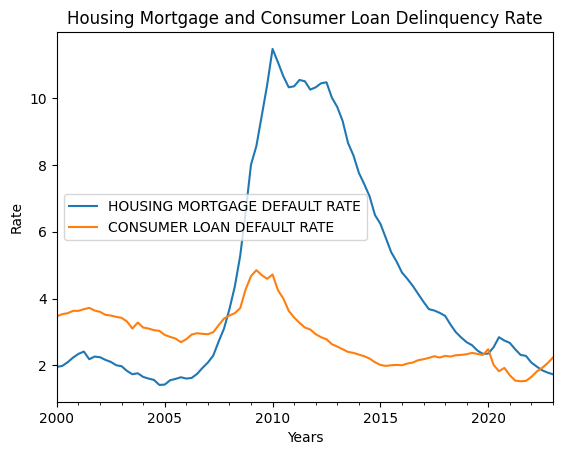

In [31]:
data = pd.concat([default_hl, default_cl], axis=1)
data.plot()
pp.xlabel('Years')
pp.ylabel('Rate')
pp.title('Housing Mortgage and Consumer Loan Delinquency Rate')